# Is your Honey Adulterated?

# Data Cleaning and Visualization

In [32]:
import os # for file access
import pandas as pd # for data processing
import numpy as np # for math processing

# for plotting
import plotly.express as px

np.random.seed(33)

Search for files

In [33]:
file = ('D:\Research\Honey Adulteration\data.xlsx')
df = pd.read_excel(file)
df.head()

,Unnamed: 0,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,...,3954.1993,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765
0,Adulterated honey,0,0,0.0,140.370,969.73,2606.0,4880.8,7470.0,10216.0,...,112.720,65.250,73.281,1.3125,42.344,82.375,36.875,40.688,0.0,0
1,Adulterated honey,0,0,0.0,38.621,570.24,1660.9,3268.0,5090.0,6982.0,...,108.130,62.750,78.750,0.0000,33.219,69.438,41.563,42.281,0.0,0
2,Adulterated honey,0,0,0.0,108.230,718.96,1930.2,3746.1,5801.8,7902.5,...,114.060,66.641,74.906,0.0000,32.625,78.281,46.688,48.094,0.0,0
3,Adulterated honey,0,0,0.0,519.060,1459.10,2952.6,4898.0,7015.8,9187.7,...,103.940,68.859,79.875,0.0000,39.563,73.594,39.063,54.031,0.0,0
4,Adulterated honey,0,0,0.0,330.430,1225.70,2843.3,4805.9,7069.6,9434.8,...,96.875,61.688,75.531,0.0000,36.094,80.188,40.313,53.656,0.0,0


In [34]:
# we will now rename column unnamed to target and we will do inplace = True so, that the change takes place in the original dataset
df.rename(columns = {'Unnamed: 0': 'target'}, inplace=True)
df.head()

,target,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,...,3954.1993,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765
0,Adulterated honey,0,0,0.0,140.370,969.73,2606.0,4880.8,7470.0,10216.0,...,112.720,65.250,73.281,1.3125,42.344,82.375,36.875,40.688,0.0,0
1,Adulterated honey,0,0,0.0,38.621,570.24,1660.9,3268.0,5090.0,6982.0,...,108.130,62.750,78.750,0.0000,33.219,69.438,41.563,42.281,0.0,0
2,Adulterated honey,0,0,0.0,108.230,718.96,1930.2,3746.1,5801.8,7902.5,...,114.060,66.641,74.906,0.0000,32.625,78.281,46.688,48.094,0.0,0
3,Adulterated honey,0,0,0.0,519.060,1459.10,2952.6,4898.0,7015.8,9187.7,...,103.940,68.859,79.875,0.0000,39.563,73.594,39.063,54.031,0.0,0
4,Adulterated honey,0,0,0.0,330.430,1225.70,2843.3,4805.9,7069.6,9434.8,...,96.875,61.688,75.531,0.0000,36.094,80.188,40.313,53.656,0.0,0


In [35]:
df.shape

(200, 1025)

In [36]:
df.dtypes.value_counts()

float64    1010
int64        14
object        1
dtype: int64

# Data aggregation and visualization

In [37]:
mean_df = df.groupby('target').mean()
mean_df

,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,176.6596,...,3954.1993,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765
target,,,,,,,,,,,,,,,,,,,,,
Adulterated honey,0.0,0.0,23.608018,280.301566,898.448687,2199.565051,4005.984848,6039.340404,8184.088889,10233.215152,...,137.910051,85.153040,104.734677,0.137942,49.836798,94.421949,48.523869,57.233949,0.169505,0.0
Pure honey,0.0,0.0,35.808744,347.256095,1084.119149,2522.284059,4471.715842,6660.859406,8960.530693,11119.242574,...,146.508713,100.433851,112.000446,0.005569,44.686406,88.440178,59.094455,68.434475,0.000000,0.0


In [38]:
mean_df = df.groupby('target').mean().T
mean_df

target,Adulterated honey,Pure honey
123.7124,0.000000,0.000000
129.6213,0.000000,0.000000
135.5237,23.608018,35.808744
141.4197,280.301566,347.256095
147.3091,898.448687,1084.119149
...,...,...
3966.1487,94.421949,88.440178
3968.5333,48.523869,59.094455
3970.9162,57.233949,68.434475
3973.2972,0.169505,0.000000


In [39]:
# plotting dataframe mean_df

fig = px.line(mean_df, 
              template = 'plotly_white', 
              width = 800, 
              height = 400
              )
fig.update_layout(legend_x = 0.7, 
                  legend_bgcolor = 'rgba(0,0,0,0)', 
                  legend_bordercolor = 'lightgray', 
                  legend_borderwidth = 2, 
                  title = 'Average Raman Spectrum for Each Honey class'
                  )
fig.update_xaxes(title = 'wavenumber')
fig.update_yaxes(title = 'intensity')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'target=Adulterated honey<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Adulterated honey',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Adulterated honey',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([123.7124, 129.6213, 135.5237, ..., 3970.9162, 3973.2972, 3975.6765],
                         dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        ,  0.        , 23.60801818, ..., 57.23394949,  0.16950505,
                           0.        ]),
              'yaxis': 'y'},
             {'hovertemplate': 'target=Pure honey<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Pure honey',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Pure honey',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([123.7124, 129.6213, 135.5237, ..., 3970.9162, 3973.2972, 3975.6765],
                         dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        ,  0.        , 35.80874356, ..., 68.43447525,  0.        ,
                           0.        ]),
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'bgcolor': 'rgba(0,0,0,0)',
                          'bordercolor': 'lightgray',
                          'borderwidth': 2,
                          'title': {'text': 'target'},
                          'tracegroupgap': 0,
                          'x': 0.7},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Average Raman Spectrum for Each Honey class'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'wavenumber'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'intensity'}}}
})

# Exploratory Data Analysis using Unsupervised Learning

# By using PCA (Principal Component Analysis)

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
X = df.select_dtypes('number')
y = df.target

# instantiating our standard scaler
scaler = StandardScaler()
# instantiating our PCA
# give me enough PCAs to account for 80 percent of variance within this dataset
# so that if the data has some variant
# we can build an unsupervised model that explains atleast 80 percent of that variance
pca = PCA(.80)

In [42]:
# This will take the z scale to fit the data
# This will basically subtract the mean of each variable and then dividing by the standard deviation
# We do this because some of the variables have a really large value, which might skew the entire data
# because it has a large magnitude while the smaller magnitude variables might be important
scaled_x = scaler.fit_transform(X)

In [43]:
# fitting of PCA
# we asked PCA to model upto 80 percent of variance
# therefore we need to know how many components we have so that we can build our dataframe
scores = pca.fit_transform(scaled_x)
num_components = min(scores.shape)
pc_cols = ['pc'+str(i+1) for i in range(num_components)]
pc_cols

['pc1',
 'pc2',
 'pc3',
 'pc4',
 'pc5',
 'pc6',
 'pc7',
 'pc8',
 'pc9',
 'pc10',
 'pc11',
 'pc12',
 'pc13',
 'pc14',
 'pc15',
 'pc16',
 'pc17',
 'pc18',
 'pc19',
 'pc20',
 'pc21',
 'pc22',
 'pc23',
 'pc24',
 'pc25',
 'pc26',
 'pc27',
 'pc28',
 'pc29',
 'pc30',
 'pc31',
 'pc32',
 'pc33',
 'pc34',
 'pc35',
 'pc36',
 'pc37',
 'pc38',
 'pc39',
 'pc40',
 'pc41',
 'pc42',
 'pc43',
 'pc44',
 'pc45',
 'pc46',
 'pc47',
 'pc48',
 'pc49',
 'pc50',
 'pc51',
 'pc52',
 'pc53',
 'pc54',
 'pc55',
 'pc56',
 'pc57',
 'pc58']

We get to know from the output that we have 58 principal components

In [44]:
# Building our dataframe this makes plotting easier as dataframes are indexed
scores_df = pd.DataFrame(scores, columns=pc_cols)
scores_df.head()

# In the generated output we can see how each column of the dataframe is a principal component

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58
0,45.826862,22.415749,-4.486764,-2.221172,-2.109315,1.535083,-2.146233,3.777078,-0.795772,1.595247,...,1.132859,5.579259,2.439783,3.453823,1.047956,-3.023532,-1.604980,-3.874340,2.499923,0.927782
1,19.054084,36.941426,-6.136772,4.107549,-5.659980,-1.085096,-2.295293,0.834884,0.471778,-0.989614,...,-1.024352,-0.493630,-0.001295,0.408983,-0.060150,3.041212,-0.947781,0.600486,-0.969626,-0.442151
2,25.687465,30.831496,-4.298208,1.866446,-8.530089,0.387546,1.599273,-1.470825,2.472065,0.822463,...,-1.401742,-1.239651,0.502414,0.527177,3.195624,0.774900,0.828190,0.312962,-1.610091,0.347426
3,30.511299,27.993873,-4.898314,0.926255,-6.836322,-0.526644,0.718298,-1.012721,-0.117684,0.398194,...,0.542532,0.088084,-0.133416,-3.043605,-1.689038,-2.810199,-0.155726,3.979121,-1.789881,2.427435
4,43.487523,23.190096,-6.607546,3.267792,-3.185873,0.821379,-1.377667,4.566726,2.220788,-0.149462,...,-0.793903,-0.676049,1.664657,-0.881730,1.908273,-1.323006,1.137897,1.122949,-0.029106,-1.055876


In [45]:
# Now, we will merge the Y data back on the dataset
# The Y data was actually the target data so this actually tells us what each sample is
# whether it is adulterated or pure
scores_df = pd.merge(y, scores_df, left_index = True, right_index = True)
scores_df.head()

,target,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58
0,Adulterated honey,45.826862,22.415749,-4.486764,-2.221172,-2.109315,1.535083,-2.146233,3.777078,-0.795772,...,1.132859,5.579259,2.439783,3.453823,1.047956,-3.023532,-1.604980,-3.874340,2.499923,0.927782
1,Adulterated honey,19.054084,36.941426,-6.136772,4.107549,-5.659980,-1.085096,-2.295293,0.834884,0.471778,...,-1.024352,-0.493630,-0.001295,0.408983,-0.060150,3.041212,-0.947781,0.600486,-0.969626,-0.442151
2,Adulterated honey,25.687465,30.831496,-4.298208,1.866446,-8.530089,0.387546,1.599273,-1.470825,2.472065,...,-1.401742,-1.239651,0.502414,0.527177,3.195624,0.774900,0.828190,0.312962,-1.610091,0.347426
3,Adulterated honey,30.511299,27.993873,-4.898314,0.926255,-6.836322,-0.526644,0.718298,-1.012721,-0.117684,...,0.542532,0.088084,-0.133416,-3.043605,-1.689038,-2.810199,-0.155726,3.979121,-1.789881,2.427435
4,Adulterated honey,43.487523,23.190096,-6.607546,3.267792,-3.185873,0.821379,-1.377667,4.566726,2.220788,...,-0.793903,-0.676049,1.664657,-0.881730,1.908273,-1.323006,1.137897,1.122949,-0.029106,-1.055876


[Text(0.5, 1.0, 'Scores Plot')]

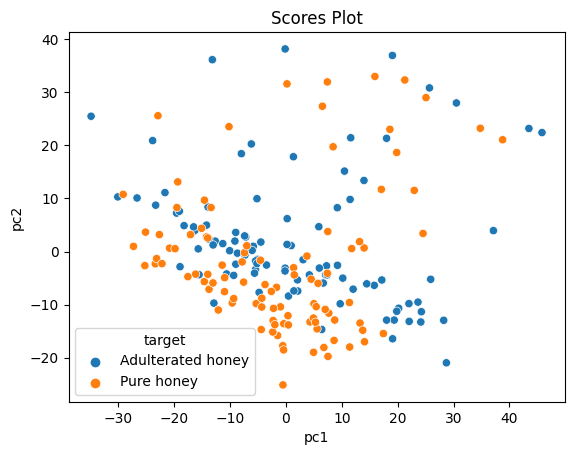

In [46]:
import seaborn as sns
# Now, we will build a scatterplot
sns.scatterplot(data=scores_df,
                x = 'pc1',
                y = 'pc2',
                hue = 'target',
                ).set(title = 'Scores Plot')

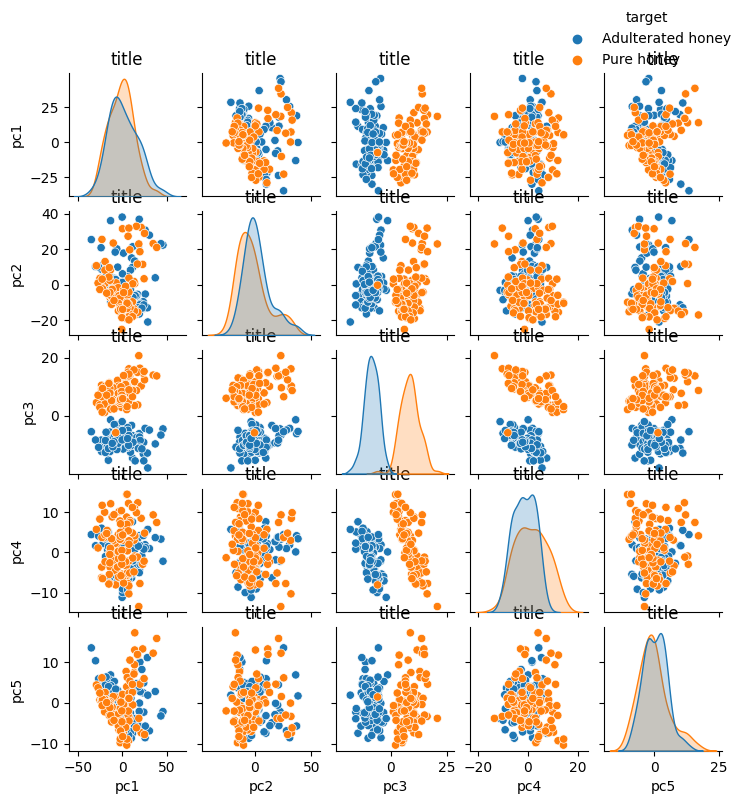

In [47]:
# creating a scatterplot matrix of the first five principal components
# also known as pairplots
# We will be plotting the first five principal components
fig = sns.pairplot(scores_df,
                   vars=pc_cols[:5],
                   hue = 'target',  # setting color according to the value of target variable
                   height = 1.5 # setting the height of the dataframe
                   ).set(title='title')

# setting the legend position
fig._legend.set_bbox_to_anchor((0.8, 1.02))

#fig.fig.suptitle('PCA Scatter Plot Matrix',
 #                y=1.01, # sets title y location
  #               x = 0.4 # sets title x-location
   #              );


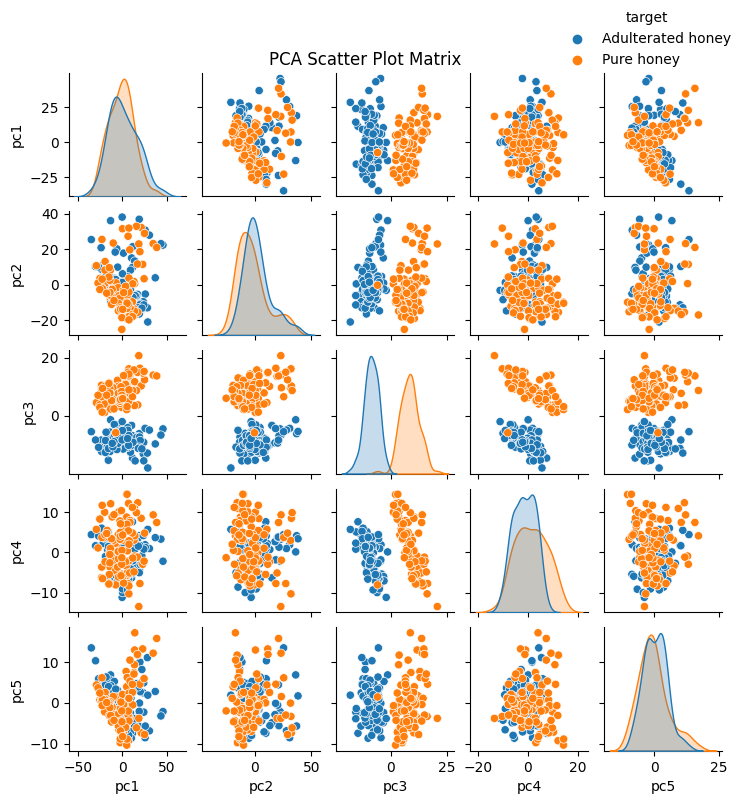

In [48]:
# creating a scatterplot matrix of the first five principal components
# also known as pairplots
# We will be plotting the first five principal components
fig = sns.pairplot(scores_df,
                   vars=pc_cols[:5],
                   hue = 'target',  # setting color according to the value of target variable
                   height = 1.5 # setting the height of the dataframe
                   )

# setting the legend position
fig._legend.set_bbox_to_anchor((0.8, 1.02))

# to add title
fig.fig.suptitle('PCA Scatter Plot Matrix',
                 y=1.01, # sets title y location
                 x = 0.4 # sets title x-location
                 );


In PC3 we have a lot of separation, it seems to be a mislabelled sample.

Let's explore PC3
To explore PC3 we will use the loadings plot or the loadings value
The loadings value tells us about the variables that go to driving the separation
To do this we will first generate the dataframe

Then we will plot the index which will tell us the variables against the PC3 value

In [49]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, index=pc_cols, columns=X.columns).T
loadings_df.index.name = 'wavenumber'

In [50]:
X_ = 'pc3'

px.scatter(loadings_df, 
            y = loadings_df.index,
            x = X_,
            # color = loadings_df.index.astype(float)
            width = 800,
            height = 500,
            template = 'seaborn',
            title = f'Loadings plot of {X_} vs. Wavenumber'
            )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'pc3=%{x}<br>wavenumber=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'rgb(76,114,176)', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([ 4.70509862e-17, -8.29414662e-18,  2.58587529e-02, ...,  6.02906465e-02,
                          -1.20483008e-02, -0.00000000e+00]),
              'xaxis': 'x',
              'y': array([123.7124, 129.6213, 135.5237, ..., 3970.9162, 3973.2972, 3975.6765],
                         dtype=object),
              'yaxis': 'y'}],
    'layout': {'height': 500,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Loadings plot of pc3 vs. Wavenumber'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'pc3'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'wavenumber'}}}
})

# Using K-means Clustering

In [51]:
df.describe()

,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,176.6596,...,3954.1993,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765
count,200.0,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,0.0,0.0,29.769385,314.113603,992.212270,2362.538150,4241.179000,6353.207500,8576.192000,10680.659000,...,142.252375,92.869850,108.403890,0.071094,47.235850,91.401155,53.862015,62.890215,0.083905,0.0
std,0.0,0.0,63.262390,275.653665,556.569243,889.826382,1284.207317,1719.537568,2175.818905,2595.946484,...,15.229033,13.062055,13.057498,0.591660,8.104466,8.921047,9.083539,8.601785,1.186596,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,248.550000,1001.100000,2203.500000,3312.400000,4175.600000,...,96.875000,61.688000,71.125000,0.000000,25.250000,58.625000,33.750000,40.688000,0.000000,0.0
25%,0.0,0.0,0.000000,85.171750,597.870000,1715.750000,3363.550000,5190.900000,7075.125000,8897.500000,...,133.925000,82.972750,103.225000,0.000000,42.508250,87.205250,47.468750,56.874750,0.000000,0.0
50%,0.0,0.0,0.000000,273.605000,936.635000,2311.100000,4195.550000,6298.700000,8559.950000,10558.000000,...,144.435000,92.351500,110.485000,0.000000,48.031500,93.074500,52.562500,62.812500,0.000000,0.0
75%,0.0,0.0,26.521750,472.275000,1336.775000,2910.650000,4965.900000,7376.600000,9940.150000,12404.250000,...,152.880000,103.452500,118.387500,0.000000,52.953000,96.839750,61.172250,68.976500,0.000000,0.0
max,0.0,0.0,324.450000,1143.600000,2663.400000,4912.700000,7896.700000,11133.000000,14573.000000,17604.000000,...,178.250000,119.840000,129.750000,7.562500,66.344000,111.250000,76.500000,86.469000,16.781000,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 1025 entries, target to 3975.6765
dtypes: float64(1010), int64(14), object(1)
memory usage: 1.6+ MB


In [53]:
df.target.value_counts()

Pure honey           101
Adulterated honey     99
Name: target, dtype: int64

In [54]:
df.isnull()

,target,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,...,3954.1993,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df.isnull().sum()

target       0
123.7124     0
129.6213     0
135.5237     0
141.4197     0
            ..
3966.1487    0
3968.5333    0
3970.9162    0
3973.2972    0
3975.6765    0
Length: 1025, dtype: int64

In [56]:
df.head()

,target,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,...,3954.1993,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765
0,Adulterated honey,0,0,0.0,140.370,969.73,2606.0,4880.8,7470.0,10216.0,...,112.720,65.250,73.281,1.3125,42.344,82.375,36.875,40.688,0.0,0
1,Adulterated honey,0,0,0.0,38.621,570.24,1660.9,3268.0,5090.0,6982.0,...,108.130,62.750,78.750,0.0000,33.219,69.438,41.563,42.281,0.0,0
2,Adulterated honey,0,0,0.0,108.230,718.96,1930.2,3746.1,5801.8,7902.5,...,114.060,66.641,74.906,0.0000,32.625,78.281,46.688,48.094,0.0,0
3,Adulterated honey,0,0,0.0,519.060,1459.10,2952.6,4898.0,7015.8,9187.7,...,103.940,68.859,79.875,0.0000,39.563,73.594,39.063,54.031,0.0,0
4,Adulterated honey,0,0,0.0,330.430,1225.70,2843.3,4805.9,7069.6,9434.8,...,96.875,61.688,75.531,0.0000,36.094,80.188,40.313,53.656,0.0,0


In [57]:
df.tail()

,target,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,...,3954.1993,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765
195,Pure honey,0,0,0.0,0.0000,356.10,1371.9,2754.7,4303.8,6002.4,...,151.50,117.63,116.56,0.0,43.750,94.406,76.50,76.250,0.0,0
196,Pure honey,0,0,0.0,0.0000,329.53,1442.3,2867.6,4558.9,6286.7,...,153.81,107.70,124.34,0.0,53.938,94.219,72.25,66.375,0.0,0
197,Pure honey,0,0,0.0,0.0000,491.31,1777.5,3501.1,5477.9,7511.6,...,157.25,111.81,121.25,0.0,51.250,95.813,65.25,58.625,0.0,0
198,Pure honey,0,0,0.0,0.1953,636.39,1992.1,3835.3,5859.8,8100.1,...,142.50,112.38,110.75,0.0,35.000,96.016,54.25,65.625,0.0,0
199,Pure honey,0,0,0.0,91.7660,870.53,2444.8,4635.7,7071.1,9581.9,...,144.75,106.88,112.55,0.0,38.906,87.211,54.00,66.250,0.0,0


In [58]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the "target" column
df['target_encoded'] = label_encoder.fit_transform(df['target'])

# Print the updated DataFrame
df.head()

,target,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,...,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765,target_encoded
0,Adulterated honey,0,0,0.0,140.370,969.73,2606.0,4880.8,7470.0,10216.0,...,65.250,73.281,1.3125,42.344,82.375,36.875,40.688,0.0,0,0
1,Adulterated honey,0,0,0.0,38.621,570.24,1660.9,3268.0,5090.0,6982.0,...,62.750,78.750,0.0000,33.219,69.438,41.563,42.281,0.0,0,0
2,Adulterated honey,0,0,0.0,108.230,718.96,1930.2,3746.1,5801.8,7902.5,...,66.641,74.906,0.0000,32.625,78.281,46.688,48.094,0.0,0,0
3,Adulterated honey,0,0,0.0,519.060,1459.10,2952.6,4898.0,7015.8,9187.7,...,68.859,79.875,0.0000,39.563,73.594,39.063,54.031,0.0,0,0
4,Adulterated honey,0,0,0.0,330.430,1225.70,2843.3,4805.9,7069.6,9434.8,...,61.688,75.531,0.0000,36.094,80.188,40.313,53.656,0.0,0,0


In [59]:
df.tail()

,target,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,...,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765,target_encoded
195,Pure honey,0,0,0.0,0.0000,356.10,1371.9,2754.7,4303.8,6002.4,...,117.63,116.56,0.0,43.750,94.406,76.50,76.250,0.0,0,1
196,Pure honey,0,0,0.0,0.0000,329.53,1442.3,2867.6,4558.9,6286.7,...,107.70,124.34,0.0,53.938,94.219,72.25,66.375,0.0,0,1
197,Pure honey,0,0,0.0,0.0000,491.31,1777.5,3501.1,5477.9,7511.6,...,111.81,121.25,0.0,51.250,95.813,65.25,58.625,0.0,0,1
198,Pure honey,0,0,0.0,0.1953,636.39,1992.1,3835.3,5859.8,8100.1,...,112.38,110.75,0.0,35.000,96.016,54.25,65.625,0.0,0,1
199,Pure honey,0,0,0.0,91.7660,870.53,2444.8,4635.7,7071.1,9581.9,...,106.88,112.55,0.0,38.906,87.211,54.00,66.250,0.0,0,1


In [60]:
df.drop(["target"], axis = 1, inplace = True)
df.head()

,123.7124,129.6213,135.5237,141.4197,147.3091,153.1921,159.0686,164.9387,170.8024,176.6596,...,3956.5927,3958.9844,3961.3743,3963.7624,3966.1487,3968.5333,3970.9162,3973.2972,3975.6765,target_encoded
0,0,0,0.0,140.370,969.73,2606.0,4880.8,7470.0,10216.0,12741.0,...,65.250,73.281,1.3125,42.344,82.375,36.875,40.688,0.0,0,0
1,0,0,0.0,38.621,570.24,1660.9,3268.0,5090.0,6982.0,8714.0,...,62.750,78.750,0.0000,33.219,69.438,41.563,42.281,0.0,0,0
2,0,0,0.0,108.230,718.96,1930.2,3746.1,5801.8,7902.5,9896.5,...,66.641,74.906,0.0000,32.625,78.281,46.688,48.094,0.0,0,0
3,0,0,0.0,519.060,1459.10,2952.6,4898.0,7015.8,9187.7,11080.0,...,68.859,79.875,0.0000,39.563,73.594,39.063,54.031,0.0,0,0
4,0,0,0.0,330.430,1225.70,2843.3,4805.9,7069.6,9434.8,11674.0,...,61.688,75.531,0.0000,36.094,80.188,40.313,53.656,0.0,0,0


In [61]:
df.columns

Index([        123.7124,         129.6213,         135.5237,         141.4197,
               147.3091,         153.1921,         159.0686,         164.9387,
               170.8024,         176.6596,
       ...
              3956.5927,        3958.9844,        3961.3743,        3963.7624,
              3966.1487,        3968.5333,        3970.9162,        3973.2972,
              3975.6765, 'target_encoded'],
      dtype='object', length=1025)

In [63]:
import matplotlib.pyplot as plt

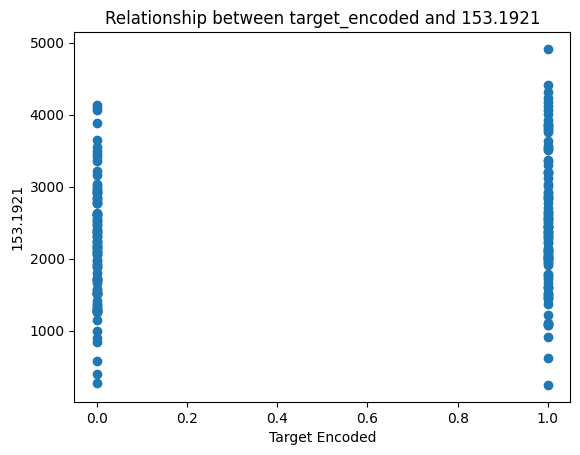

In [64]:
# Create the scatter plot
plt.scatter(x=df['target_encoded'], y=df[153.1921])
plt.title("Relationship between target_encoded and 153.1921")
plt.xlabel("Target Encoded")
plt.ylabel("153.1921")
plt.show()


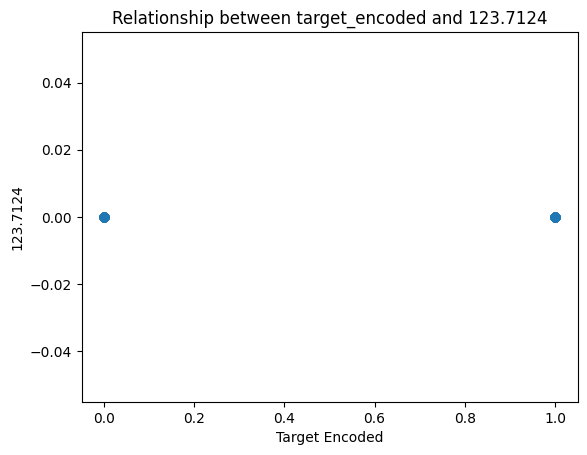

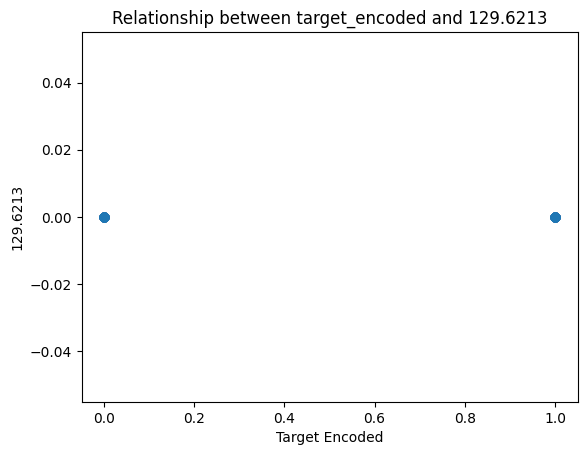

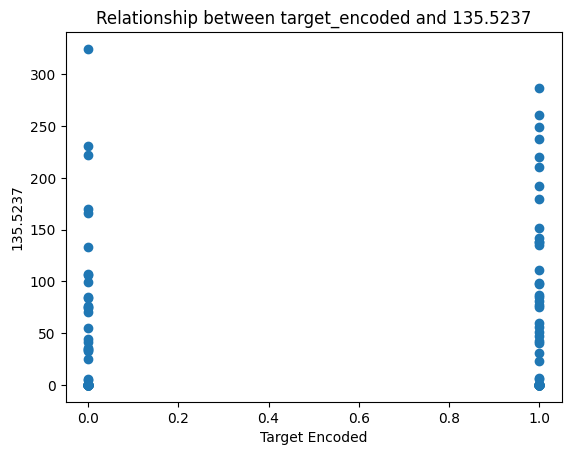

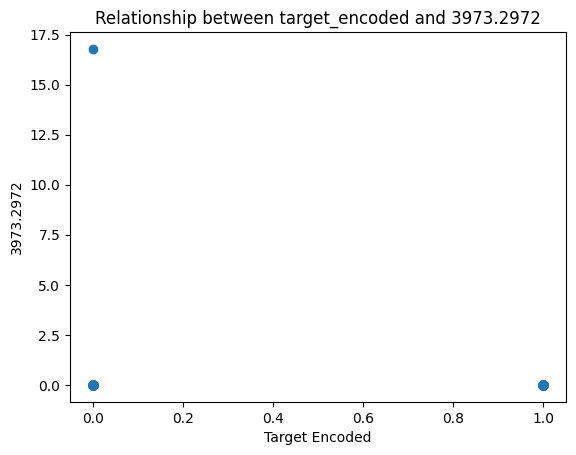

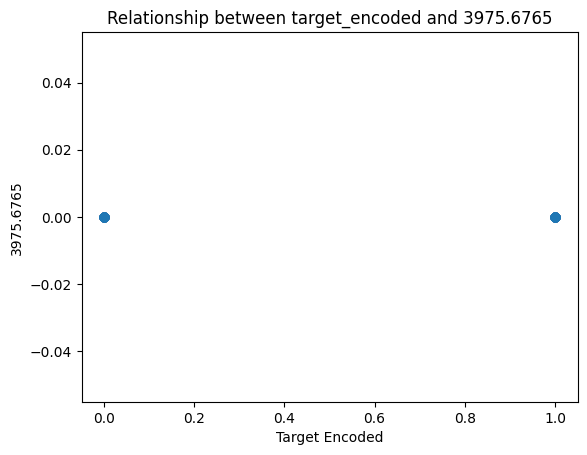

In [65]:
# Get the column names excluding the target variable
column_names = df.columns.drop(['target_encoded'])

# Create a scatter plot for the first three column names
for column in column_names[:3]:
    plt.scatter(x=df['target_encoded'], y=df[column])
    plt.title(f"Relationship between target_encoded and {column}")
    plt.xlabel("Target Encoded")
    plt.ylabel(column)
    plt.show()

# Create a scatter plot for the last two column names
for column in column_names[-2:]:
    plt.scatter(x=df['target_encoded'], y=df[column])
    plt.title(f"Relationship between target_encoded and {column}")
    plt.xlabel("Target Encoded")
    plt.ylabel(column)
    plt.show()

# Elbow Method

In [66]:
x1 = df.loc[:, ["target_encoded", 159.0686]].values
x1

array([[0.0000e+00, 4.8808e+03],
       [0.0000e+00, 3.2680e+03],
       [0.0000e+00, 3.7461e+03],
       [0.0000e+00, 4.8980e+03],
       [0.0000e+00, 4.8059e+03],
       [0.0000e+00, 2.4356e+03],
       [0.0000e+00, 2.5178e+03],
       [0.0000e+00, 3.2895e+03],
       [0.0000e+00, 3.1645e+03],
       [0.0000e+00, 5.3298e+03],
       [0.0000e+00, 4.4429e+03],
       [0.0000e+00, 3.2477e+03],
       [0.0000e+00, 3.4828e+03],
       [0.0000e+00, 2.7804e+03],
       [0.0000e+00, 3.3110e+03],
       [0.0000e+00, 3.4967e+03],
       [0.0000e+00, 4.6537e+03],
       [0.0000e+00, 2.2008e+03],
       [0.0000e+00, 1.6368e+03],
       [0.0000e+00, 3.8736e+03],
       [0.0000e+00, 3.6064e+03],
       [0.0000e+00, 3.5677e+03],
       [0.0000e+00, 4.8854e+03],
       [0.0000e+00, 4.5086e+03],
       [0.0000e+00, 5.8929e+03],
       [0.0000e+00, 4.7244e+03],
       [0.0000e+00, 5.8890e+03],
       [0.0000e+00, 4.9156e+03],
       [0.0000e+00, 3.0104e+03],
       [0.0000e+00, 6.3827e+03],
       [0.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

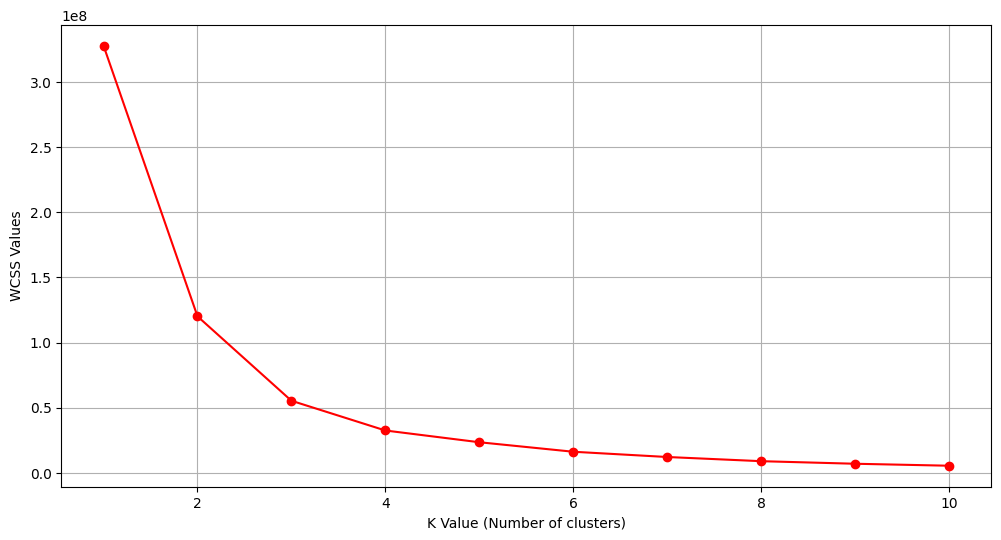

In [67]:
from sklearn.cluster import KMeans

# creating a blank list wcss
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, color="red", marker = "o")
plt.xlabel("K Value (Number of clusters)")
plt.ylabel("WCSS Values")
plt.show()

In [68]:
#Initialize the class object
kmeans = KMeans(n_clusters=4)

#predict the labels of clusters.
label = kmeans.fit_predict(x1)

print(label)

[3 0 0 3 3 2 2 0 0 3 3 0 0 2 0 0 3 2 2 0 0 0 3 3 1 3 1 3 2 1 1 3 0 1 3 3 3
 3 3 0 0 3 0 3 1 1 3 3 3 2 2 2 2 2 2 1 2 0 3 1 2 2 2 2 0 0 0 0 0 3 0 2 2 0
 2 0 0 1 1 3 3 0 3 3 3 0 2 0 2 0 0 3 0 3 3 0 3 3 1 3 1 2 2 0 2 0 3 1 0 2 1
 0 1 1 1 3 1 1 2 1 0 3 3 0 0 0 3 3 3 0 0 3 0 2 1 0 0 3 2 0 3 3 1 1 1 0 0 0
 3 3 3 0 3 3 0 1 0 1 3 0 3 1 3 1 1 1 1 1 3 3 0 1 3 1 3 0 3 3 1 3 2 0 0 3 3
 3 3 0 3 1 2 2 2 2 0 2 2 0 0 3]


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [69]:
print(kmeans.cluster_centers_)

[[4.75409836e-01 3.63134098e+03]
 [6.75675676e-01 6.22182162e+03]
 [3.88888889e-01 2.44829722e+03]
 [5.00000000e-01 4.67239242e+03]]


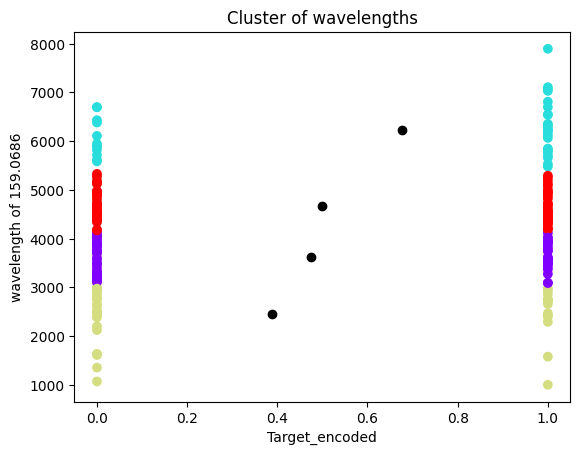

In [70]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')

#Plotting cluster center
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color='black')

plt.title('Cluster of wavelengths')
plt.xlabel('Target_encoded')
plt.ylabel('wavelength of 159.0686')
plt.show()

In [71]:
x2 = df.loc[:, [141.4197, 176.6596]].values
x2

array([[1.4037e+02, 1.2741e+04],
       [3.8621e+01, 8.7140e+03],
       [1.0823e+02, 9.8965e+03],
       [5.1906e+02, 1.1080e+04],
       [3.3043e+02, 1.1674e+04],
       [9.3320e+01, 6.6469e+03],
       [1.6784e+02, 6.4500e+03],
       [0.0000e+00, 9.4425e+03],
       [0.0000e+00, 9.0338e+03],
       [1.4086e+02, 1.3529e+04],
       [3.1101e+02, 1.1175e+04],
       [0.0000e+00, 9.3727e+03],
       [2.7736e+02, 8.4789e+03],
       [1.6973e+02, 7.2266e+03],
       [1.5538e+02, 8.5934e+03],
       [4.6702e+02, 8.2066e+03],
       [7.2431e+02, 1.0564e+04],
       [3.1639e+02, 5.3780e+03],
       [1.1005e+02, 4.1756e+03],
       [1.1190e+02, 1.0572e+04],
       [8.5949e+01, 9.6655e+03],
       [3.1770e+02, 8.6577e+03],
       [1.5699e+02, 1.2627e+04],
       [0.0000e+00, 1.2368e+04],
       [3.9966e+02, 1.4061e+04],
       [1.7706e+02, 1.2354e+04],
       [7.0028e+02, 1.3957e+04],
       [4.5775e+02, 1.2075e+04],
       [2.5135e+02, 7.6733e+03],
       [1.0689e+03, 1.4206e+04],
       [7.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

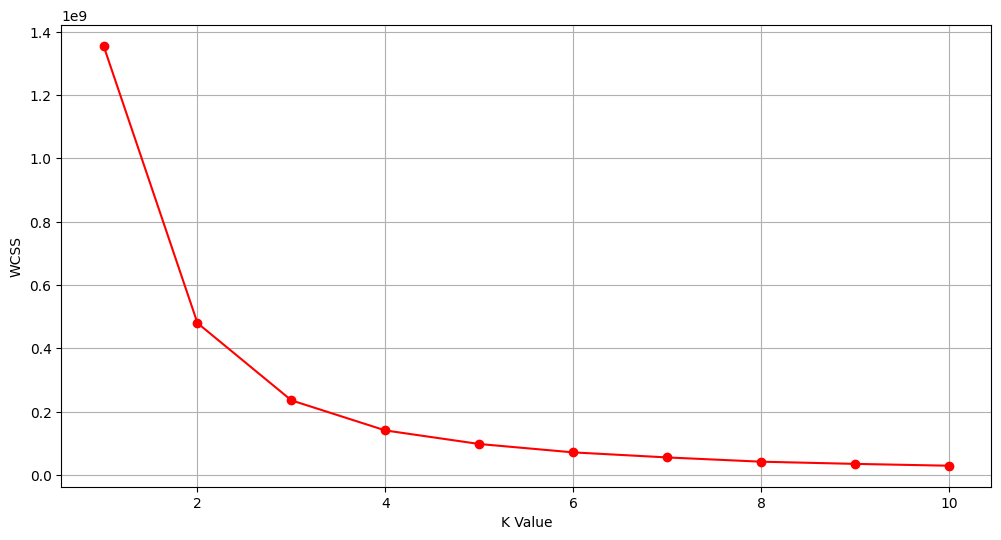

In [72]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, color="red", marker = "o")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [73]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(x2)

print(label)

[0 1 2 2 2 1 1 2 1 0 2 2 1 1 1 1 2 1 1 2 2 1 0 2 0 2 0 2 1 0 0 2 2 0 2 2 2
 2 2 2 2 0 2 2 0 0 0 2 2 1 1 1 1 1 1 0 1 2 2 0 1 1 1 1 2 2 1 2 2 2 1 1 1 2
 1 2 2 0 0 2 2 1 2 2 2 1 1 2 1 2 2 2 2 0 0 2 2 2 0 2 0 1 1 1 1 2 2 0 2 1 0
 1 0 0 0 2 0 0 1 0 2 2 2 2 2 2 2 2 0 1 1 2 1 1 0 1 1 2 1 2 0 2 0 0 0 1 2 2
 0 2 2 2 0 2 1 0 2 0 2 1 2 0 2 0 0 0 0 0 2 0 2 0 2 0 2 1 2 2 0 2 1 2 2 2 2
 0 2 2 2 0 1 1 1 1 2 1 1 2 2 2]


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [74]:
print(kmeans.cluster_centers_)

[[  579.86674    14081.64      ]
 [  122.63022807  7614.44210526]
 [  288.59635054 10731.4688172 ]]


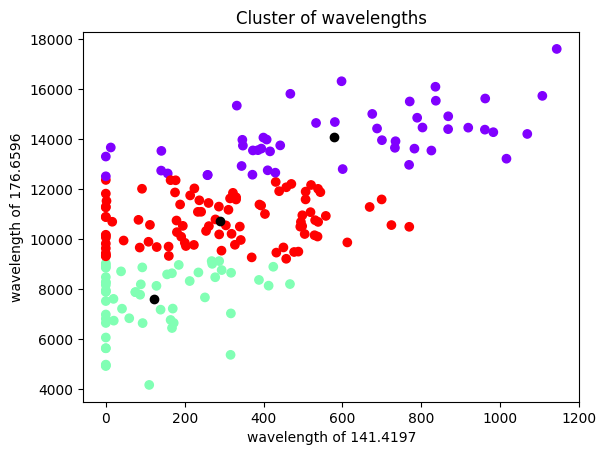

In [75]:
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap='rainbow')

#Plotting cluster center
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color='black')

plt.title('Cluster of wavelengths')
plt.xlabel('wavelength of 141.4197')
plt.ylabel('wavelength of 176.6596')
plt.show()

In [76]:
x3 = df.loc[:, ["target_encoded", 141.4197, 176.6596]].values
x3

array([[0.0000e+00, 1.4037e+02, 1.2741e+04],
       [0.0000e+00, 3.8621e+01, 8.7140e+03],
       [0.0000e+00, 1.0823e+02, 9.8965e+03],
       [0.0000e+00, 5.1906e+02, 1.1080e+04],
       [0.0000e+00, 3.3043e+02, 1.1674e+04],
       [0.0000e+00, 9.3320e+01, 6.6469e+03],
       [0.0000e+00, 1.6784e+02, 6.4500e+03],
       [0.0000e+00, 0.0000e+00, 9.4425e+03],
       [0.0000e+00, 0.0000e+00, 9.0338e+03],
       [0.0000e+00, 1.4086e+02, 1.3529e+04],
       [0.0000e+00, 3.1101e+02, 1.1175e+04],
       [0.0000e+00, 0.0000e+00, 9.3727e+03],
       [0.0000e+00, 2.7736e+02, 8.4789e+03],
       [0.0000e+00, 1.6973e+02, 7.2266e+03],
       [0.0000e+00, 1.5538e+02, 8.5934e+03],
       [0.0000e+00, 4.6702e+02, 8.2066e+03],
       [0.0000e+00, 7.2431e+02, 1.0564e+04],
       [0.0000e+00, 3.1639e+02, 5.3780e+03],
       [0.0000e+00, 1.1005e+02, 4.1756e+03],
       [0.0000e+00, 1.1190e+02, 1.0572e+04],
       [0.0000e+00, 8.5949e+01, 9.6655e+03],
       [0.0000e+00, 3.1770e+02, 8.6577e+03],
       [0.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

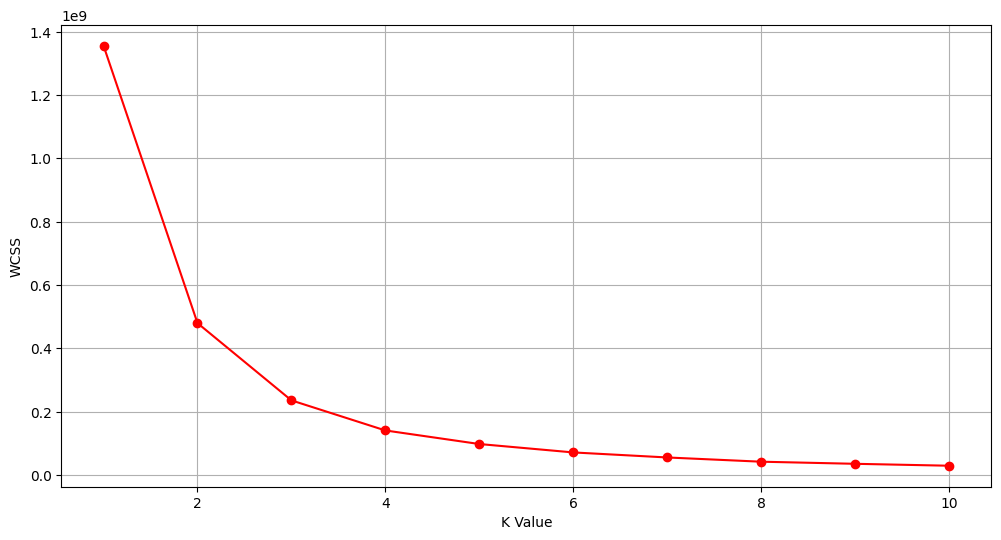

In [77]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, color="red", marker = "o")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [78]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x3)

print(label)

[3 0 0 3 3 2 2 0 0 1 3 0 0 2 0 0 3 2 2 3 0 0 3 3 1 3 1 3 2 1 1 3 0 1 3 0 3
 3 3 0 3 1 3 3 1 1 3 3 0 2 2 2 2 2 2 1 2 3 3 1 2 2 2 2 0 0 0 0 0 3 0 2 0 0
 0 3 0 1 1 3 3 0 3 3 3 0 2 0 0 0 0 3 0 3 3 0 3 3 1 3 1 2 2 0 2 0 3 1 0 2 1
 0 1 1 1 3 1 1 2 1 0 3 3 0 0 0 3 3 3 0 0 3 0 2 1 0 0 3 2 0 3 3 1 1 1 0 0 0
 3 3 3 0 1 3 0 1 0 1 3 0 3 1 3 1 1 1 1 1 3 3 0 1 3 1 3 0 3 0 1 0 2 3 3 3 3
 3 3 0 3 1 2 0 0 0 3 2 2 0 0 3]


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [79]:
print(kmeans.cluster_centers_)

[[4.92063492e-01 2.07622417e+02 9.28803651e+03]
 [6.50000000e-01 6.50560925e+02 1.44339250e+04]
 [3.66666667e-01 7.59455000e+01 6.70475000e+03]
 [4.92537313e-01 3.20025467e+02 1.15296418e+04]]


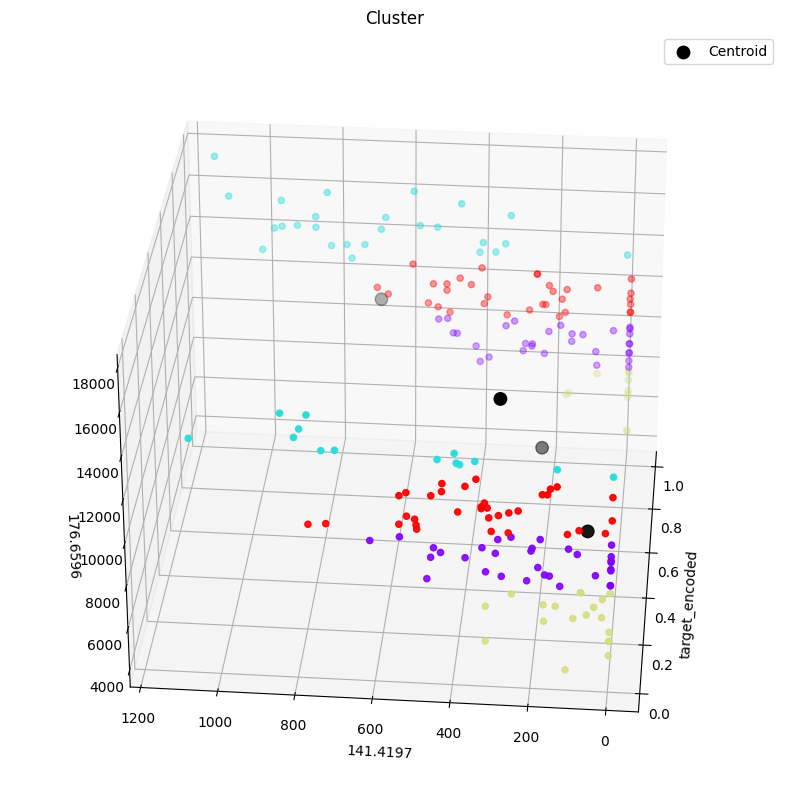

In [81]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3[:,0], x3[:,1], x3[:,2], c=kmeans.labels_, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 80, color = 'black', label = 'Centroid')
ax.view_init(30, 185)

plt.title('Cluster')
plt.xlabel("target_encoded")
plt.ylabel('141.4197')
ax.set_zlabel('176.6596')
plt.legend()
plt.show()

# Supervised Machine Learning

In [83]:
# for splitting the entire dataset into training and testing dataset
from sklearn.model_selection import train_test_split
# model development is done using the training dataset
# model validation is done using the testing dataset
# robustness of the model

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

We will be using Decision Tree Classifier and Logistic Regression Classifier using sklearn module.

The benefit of using sklearn is that their whole framework is built on the same platform

In [84]:
# splitting our dataset
# test size will be 10 percent of the full dataset
# shuffle is set to true so that the dataset is shuffled so that we have random data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, shuffle=True)

# Model 1: Decision Tree Classifier w/ and w/o PCA

In [85]:
# building a tree model for which we will use DecisionTreeClassifier

tree_only = DecisionTreeClassifier(max_depth=3, max_features=50)

In [86]:
# fitting the model
tree_only.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=50)

In [87]:
import matplotlib.pyplot as plt

In [88]:
# Using the X_train and y_train data to estimate the
# model parameters to figure out which variables are 
# the most predictive
# We will then navigate a path down this decision tree
# to build that model to visualize it you can use 
# Dot Plot Tree. This allows you to see the variables.
fig = px.line(y = tree_only.feature_importances_,
                x=X.columns,
                template = 'seaborn',
                title = 'Feature Importance for Decision Tree',
                width = 800,
                height = 400
                )

fig.update_yaxes(title = 'intensity')
fig.update_xaxes(title = 'wavenumber')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': 'rgb(76,114,176)', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([123.7124, 129.6213, 135.5237, ..., 3970.9162, 3973.2972, 3975.6765],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0., 0., 0., ..., 0., 0., 0.]),
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Feature Importance for Decision Tree'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'wavenumber'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'intensity'}}}
})

In [89]:
tree_only.score(X_test, y_test)

0.95

# Model 2: Logistic Regression

In [90]:
lr = LogisticRegression(C = 10,
                        penalty='l1',
                        solver='liblinear',
                        max_iter=100)

In [91]:
lr.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [92]:
lr.score(X_train, y_train)

1.0

In [93]:
fig = px.line(y = lr.coef_.flatten(),
              x = X.columns.astype(float),
              template = 'seaborn',
              title = 'model coefficients for logistic regression',
              width=800,
              height=400
              )
fig.update_xaxes(title = 'wavenumber')
fig.update_yaxes(title = 'intensity')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': 'rgb(76,114,176)', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([ 123.7124,  129.6213,  135.5237, ..., 3970.9162, 3973.2972, 3975.6765]),
              'xaxis': 'x',
              'y': array([0., 0., 0., ..., 0., 0., 0.]),
              'yaxis': 'y'}],
    'layout': {'height': 400,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'model coefficients for logistic regression'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'wavenumber'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'intensity'}}}
})